In [1]:
from ase.io import read, write
import numpy as np
from matplotlib import pyplot as plt
from mace.calculators import mace_mp, mace_off
from ase import units
from matplotlib.gridspec import GridSpec
from PIL import Image
from matplotlib import rc

In [2]:
#neb_reax1 = read('pyridine/mace-neb-al/reaxff-neb/neb-32im-from-al-k22.xyz', ':')
neb_reax2 = read('reaxff-neb/from_al/neb.xyz', ':')
neb_al = read('./mace-neb-al-250steps/iter18/neb-mp2.xyz', ':')
#neb_finetuned_reax = read('./NEB_results/Reax_finetuned_neb.xyz', ':')
neb_finetuned_reax = read('./reaxff-neb/fine_tuned/neb.xyz', ':')

In [3]:
#e_reax1 = np.array([at.get_potential_energy() for at in neb_reax1])
e_reax2 = np.array([at.get_potential_energy() for at in neb_reax2])
e_al = np.array([at.get_potential_energy() for at in neb_al])
e_al_mp2 = np.array([at.info['mp2_energy'] for at in neb_al])
e_finetuned_reax = np.array([at.get_potential_energy() for at in neb_finetuned_reax])
#e_mp2_from_reax = np.array([at.get_potential_energy() for at in neb_mp2_from_reax])

In [4]:
np.max(e_al) - e_al[0]

2.6698438048952085

In [5]:
np.max(e_finetuned_reax) - e_finetuned_reax[0]

2.6103455984001016

In [6]:
e_finetuned_reax[-1] - e_finetuned_reax[0]

-0.008139442302152133

In [7]:
np.max(e_reax2) - e_reax2[-1]

2.0716680269261616

In [8]:
(e_reax2[-1] - e_reax2[0]) - (e_al[-1] - e_al[0])

0.7862844336601285

In [9]:
e_al[-1] - e_al[0]

-0.05166182230095728

In [10]:
#d1_reax1 = np.array([at.get_distance(5, 10) for at in neb_reax1])
#d2_reax1 = np.array([at.get_distance(5, 16) for at in neb_reax1])

d1_reax2 = np.array([at.get_distance(5, 10) for at in neb_reax2])
d2_reax2 = np.array([at.get_distance(5, 16) for at in neb_reax2])

d1_mp2 = np.array([at.get_distance(5, 10) for at in neb_al])
d2_mp2 = np.array([at.get_distance(5, 16) for at in neb_al])

d1_finetuned_reax = np.array([at.get_distance(5, 10) for at in neb_finetuned_reax])
d2_finetuned_reax = np.array([at.get_distance(5, 16) for at in neb_finetuned_reax])

In [11]:
train_configs = read('mace-neb-al-250steps/iter18/train.xyz', '5:')
train1 = train_configs[:40]
train2 = train_configs[40:]



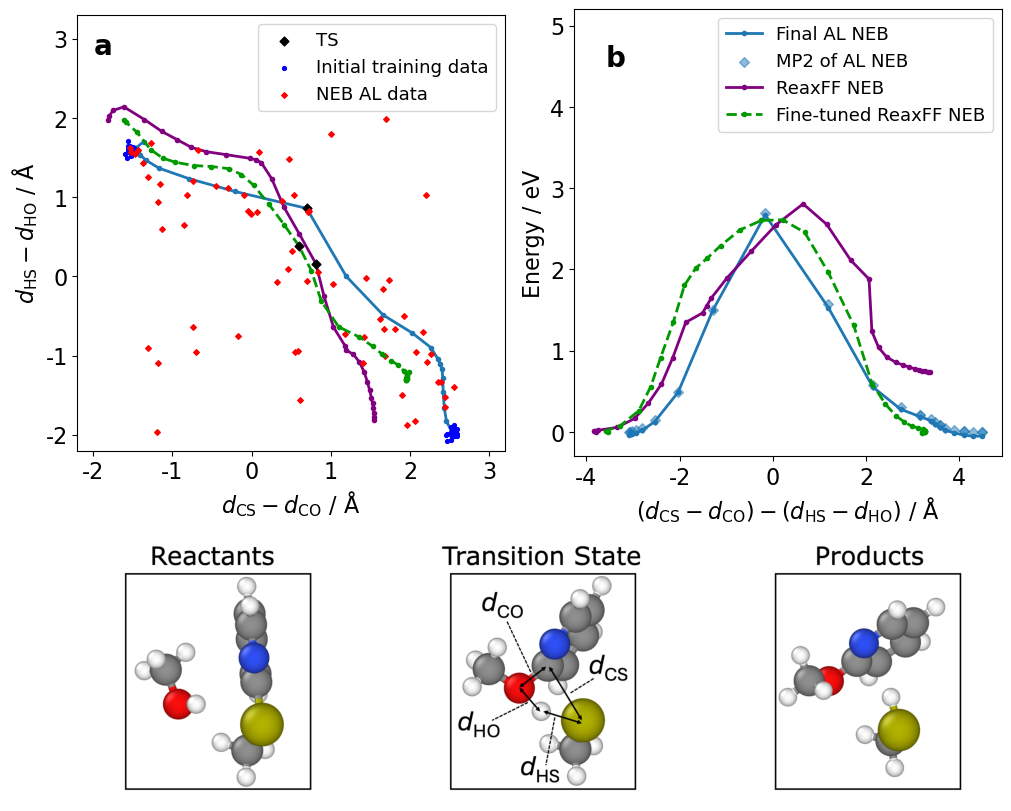

In [20]:
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

fig = plt.figure(layout='constrained', figsize=(10,8))

plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['legend.title_fontsize'] = 13
plt.rcParams['axes.unicode_minus'] = False

gs = GridSpec(8, 10, figure=fig)

ax1 = fig.add_subplot(gs[0:5, 0:5])
ax2 = fig.add_subplot(gs[0:5, 5:10])

ax3 = fig.add_subplot(gs[5:8, 0:10])


""" Axis 1 """

dc = [-at.get_distance(5, 16) + at.get_distance(5, 10) for at in neb_al]
dh = [at.get_distance(20, 10) - at.get_distance(20, 16) for at in neb_al]
ax1.plot(dc, dh, linewidth=2, marker='.')
ts_idx = np.argmax(e_al)
ax1.scatter(dc[ts_idx], dh[ts_idx], marker='D', c='#000000', label='TS', s=20, zorder=2)

dc = [-at.get_distance(5, 16) + at.get_distance(5, 10) for at in neb_reax2]
dh = [at.get_distance(20, 10) - at.get_distance(20, 16) for at in neb_reax2]
ax1.plot(dc, dh, linewidth=2, marker='.', c='purple')
ts_idx = np.argmax(e_reax2)
ax1.scatter(dc[ts_idx], dh[ts_idx], marker='D', c='#000000', s=20, zorder=2)


dc = [-at.get_distance(5, 16) + at.get_distance(5, 10) for at in train1]
dh = [at.get_distance(20, 10) - at.get_distance(20, 16) for at in train1]
ax1.scatter(dc, dh, marker='.', s=30, c='blue', zorder=2, label='Initial training data')

dc = [-at.get_distance(5, 16) + at.get_distance(5, 10) for at in train2]
dh = [at.get_distance(20, 10) - at.get_distance(20, 16) for at in train2]
ax1.scatter(dc, dh, marker='D', s=8, c='red', zorder=2, label='NEB AL data')

ax1.set_xlabel(r'$d_\text{CS} - d_\text{CO}\ /\ \mathrm{\AA}$')
ax1.set_ylabel(r'$d_\text{HS} - d_\text{HO}\ /\ \mathrm{\AA}$')
ax1.set_aspect('equal')
ax1.set_xlim(-2.2, 3.2)
ax1.set_ylim(-2.2, 3.3)
ax2.set_ylim(-0.3, 5.2)

ax1.text(-2, 2.8, r'$\bf{a}$', fontsize=20)
ax2.text(-3.6, 4.5, r'$\bf{b}$', fontsize=20)
#ax1.text(-2.8, -0.5, 'H transfer first,\nreaction second')
#ax1.text(1, 1.5, 'Reaction first,\nH transfer second')

""" Axis 2 """

dc = np.array([-at.get_distance(5, 16) + at.get_distance(5, 10) for at in neb_al])
dh = np.array([at.get_distance(20, 10) - at.get_distance(20, 16) for at in neb_al])
ax2.plot(dc - dh, e_al-e_al[0], marker='.', label='Final AL NEB', lw=2)

display_mp2 = np.append(np.arange(21), [12, 15, 18, 20])
ax2.scatter((dc - dh)[display_mp2], (e_al_mp2-e_al_mp2[0])[display_mp2], marker='D', label='MP2 of AL NEB', alpha=0.5, s=25)

# ReaxFF-optimized

dc = np.array([-at.get_distance(5, 16) + at.get_distance(5, 10) for at in neb_reax2])
dh = np.array([at.get_distance(20, 10) - at.get_distance(20, 16) for at in neb_reax2])

ax2.plot(dc - dh, e_reax2 - e_reax2[0], marker='.', label='ReaxFF NEB', lw=2, c='purple')

# ReaxFF - finetuned

dc = np.array([-at.get_distance(5, 16) + at.get_distance(5, 10) for at in neb_finetuned_reax])
dh = np.array([at.get_distance(20, 10) - at.get_distance(20, 16) for at in neb_finetuned_reax])
ax1.plot(dc, dh, linewidth=2, marker='.', c='#009900', ls='--')
ts_idx = np.argmax(e_finetuned_reax)
ax1.scatter(dc[ts_idx], dh[ts_idx], marker='D', c='#000000', s=20, zorder=2)
ax2.plot((dc - dh), (e_finetuned_reax-e_finetuned_reax[0]), c='#009900', linewidth=2, label='Fine-tuned ReaxFF NEB', marker='.', ls='--')

"""
for x, y1, y2 in zip(dc - dh, e_al-e_al[0], e_al_reax-e_al_reax[0]):
    ax2.plot([x, x], [y1, y2], c='green', linewidth=1)
"""




ax2.set_ylabel('Energy / eV')
ax2.set_xlabel(r'($d_\text{CS} - d_\text{CO}) - (d_\text{HS} - d_\text{HO})\ /\ \mathrm{\AA}$')

img = np.asarray(Image.open('../reax_corr.png'))
ax3.imshow(img)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.axis('off')
ax1.legend()
ax2.legend()

plt.savefig('./Figure_6_correction_hires.pdf')

In [20]:
np.max(e_reax2) - e_reax2[-1]

2.0716680269261616

In [21]:
np.max(e_al) - e_al[-1]

2.7215056271961657

In [16]:
2.6707518 - 0.71513478

1.95561702

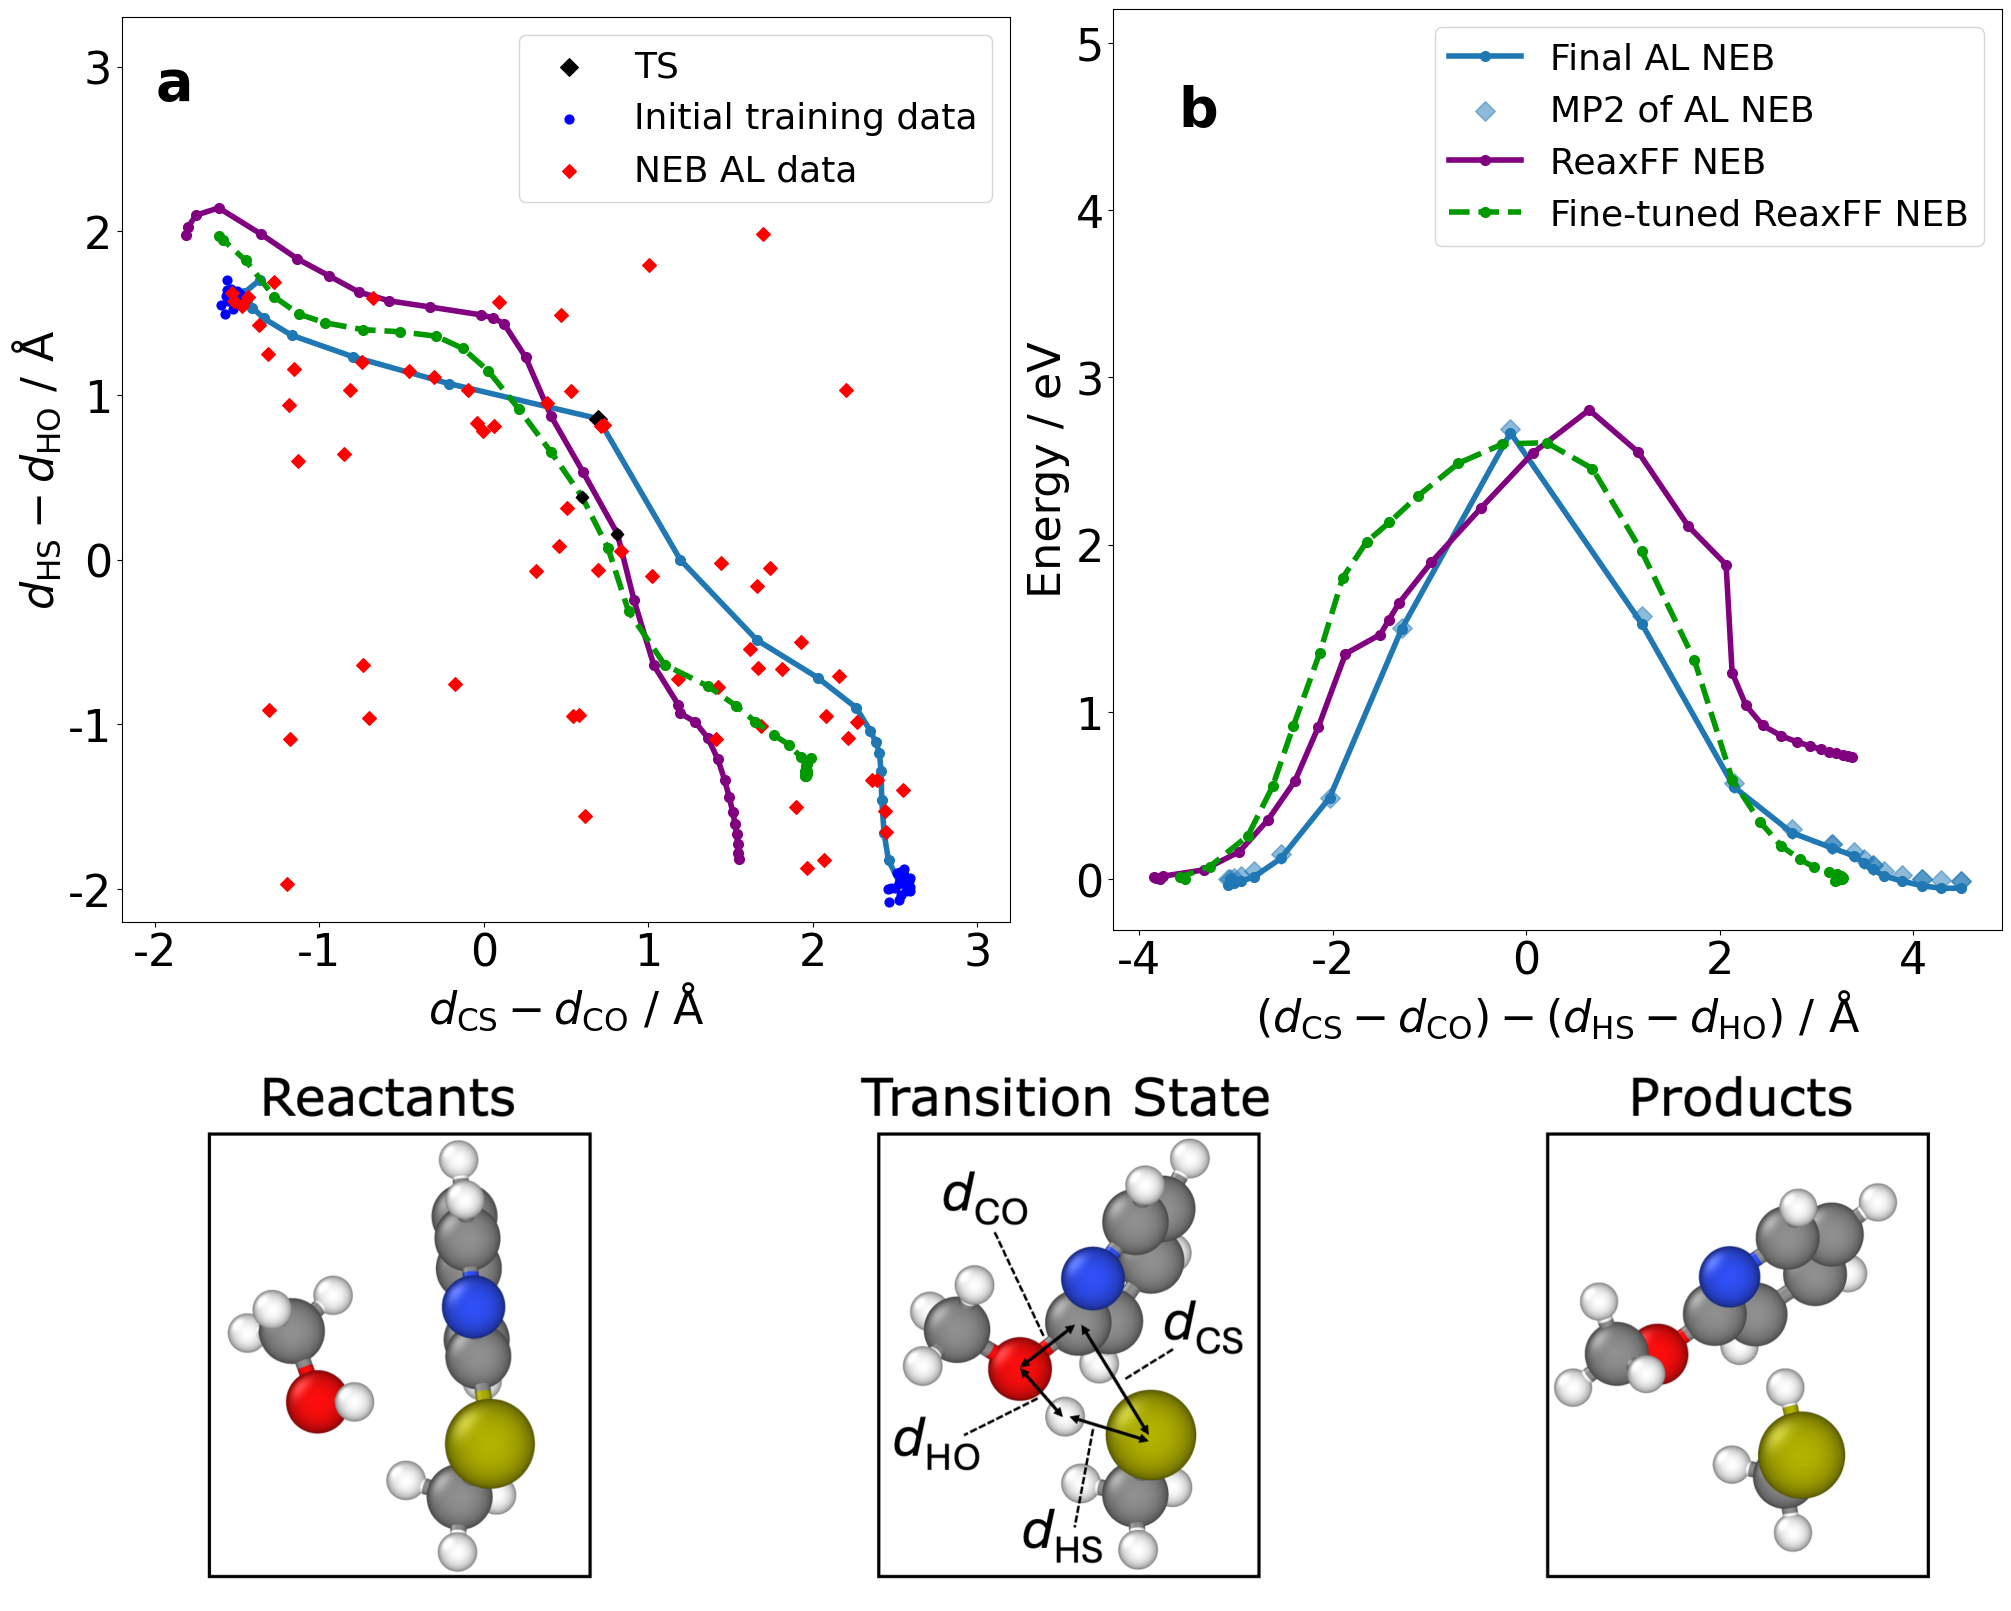

In [34]:
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

fig = plt.figure(layout='constrained', figsize=(20,16))

plt.rcParams['axes.titlesize'] = 32
plt.rcParams['axes.labelsize'] = 32
plt.rcParams['xtick.labelsize'] = 32
plt.rcParams['ytick.labelsize'] = 32
plt.rcParams['legend.fontsize'] = 26
plt.rcParams['legend.title_fontsize'] = 26
plt.rcParams['axes.unicode_minus'] = False

gs = GridSpec(8, 10, figure=fig)

ax1 = fig.add_subplot(gs[0:5, 0:5])
ax2 = fig.add_subplot(gs[0:5, 5:10])

ax3 = fig.add_subplot(gs[5:8, 0:10])


""" Axis 1 """

dc = [-at.get_distance(5, 16) + at.get_distance(5, 10) for at in neb_al]
dh = [at.get_distance(20, 10) - at.get_distance(20, 16) for at in neb_al]
ax1.plot(dc, dh, linewidth=4, marker='.', markersize=14)
ts_idx = np.argmax(e_al)
ax1.scatter(dc[ts_idx], dh[ts_idx], marker='D', c='#000000', label='TS', s=80, zorder=2)

dc = [-at.get_distance(5, 16) + at.get_distance(5, 10) for at in neb_reax2]
dh = [at.get_distance(20, 10) - at.get_distance(20, 16) for at in neb_reax2]
ax1.plot(dc, dh, linewidth=4, marker='.', c='purple', markersize=14)
ts_idx = np.argmax(e_reax2)
ax1.scatter(dc[ts_idx], dh[ts_idx], marker='D', c='#000000', s=40, zorder=2)


dc = [-at.get_distance(5, 16) + at.get_distance(5, 10) for at in train1]
dh = [at.get_distance(20, 10) - at.get_distance(20, 16) for at in train1]
ax1.scatter(dc, dh, marker='.', s=160, c='blue', zorder=2, label='Initial training data')

dc = [-at.get_distance(5, 16) + at.get_distance(5, 10) for at in train2]
dh = [at.get_distance(20, 10) - at.get_distance(20, 16) for at in train2]
ax1.scatter(dc, dh, marker='D', s=48, c='red', zorder=2, label='NEB AL data')

ax1.set_xlabel(r'$d_\text{CS} - d_\text{CO}\ /\ \mathrm{\AA}$')
ax1.set_ylabel(r'$d_\text{HS} - d_\text{HO}\ /\ \mathrm{\AA}$')
ax1.set_aspect('equal')
ax1.set_xlim(-2.2, 3.2)
ax1.set_ylim(-2.2, 3.3)
ax2.set_ylim(-0.3, 5.2)

ax1.text(-2, 2.8, r'$\bf{a}$', fontsize=40)
ax2.text(-3.6, 4.5, r'$\bf{b}$', fontsize=40)
#ax1.text(-2.8, -0.5, 'H transfer first,\nreaction second')
#ax1.text(1, 1.5, 'Reaction first,\nH transfer second')

""" Axis 2 """

dc = np.array([-at.get_distance(5, 16) + at.get_distance(5, 10) for at in neb_al])
dh = np.array([at.get_distance(20, 10) - at.get_distance(20, 16) for at in neb_al])
ax2.plot(dc - dh, e_al-e_al[0], marker='.', label='Final AL NEB', lw=4, markersize=14)

display_mp2 = np.append(np.arange(21), [12, 15, 18, 20])
ax2.scatter((dc - dh)[display_mp2], (e_al_mp2-e_al_mp2[0])[display_mp2], marker='D', label='MP2 of AL NEB', alpha=0.5, s=100)

# ReaxFF-optimized

dc = np.array([-at.get_distance(5, 16) + at.get_distance(5, 10) for at in neb_reax2])
dh = np.array([at.get_distance(20, 10) - at.get_distance(20, 16) for at in neb_reax2])

ax2.plot(dc - dh, e_reax2 - e_reax2[0], marker='.', label='ReaxFF NEB', lw=4, c='purple', markersize=14)

# ReaxFF - finetuned

dc = np.array([-at.get_distance(5, 16) + at.get_distance(5, 10) for at in neb_finetuned_reax])
dh = np.array([at.get_distance(20, 10) - at.get_distance(20, 16) for at in neb_finetuned_reax])
ax1.plot(dc, dh, linewidth=4, marker='.', c='#009900', ls='--', markersize=14)
ts_idx = np.argmax(e_finetuned_reax)
ax1.scatter(dc[ts_idx], dh[ts_idx], marker='D', c='#000000', s=40, zorder=2)
ax2.plot((dc - dh), (e_finetuned_reax-e_finetuned_reax[0]), c='#009900', linewidth=4, label='Fine-tuned ReaxFF NEB', marker='.', ls='--', markersize=14)

"""
for x, y1, y2 in zip(dc - dh, e_al-e_al[0], e_al_reax-e_al_reax[0]):
    ax2.plot([x, x], [y1, y2], c='green', linewidth=1)
"""




ax2.set_ylabel('Energy / eV')
ax2.set_xlabel(r'($d_\text{CS} - d_\text{CO}) - (d_\text{HS} - d_\text{HO})\ /\ \mathrm{\AA}$')

img = np.asarray(Image.open('../reax_corr.png'))
ax3.imshow(img)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.axis('off')
ax1.legend()
ax2.legend()

plt.savefig('./Figure_6_correction_hires.pdf')